In [22]:
# Some boilerplate code

import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

# Setting up grids for the vector plotting

def grid_setup():
    major_ticks = jnp.arange(-5, 6)    
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.grid(b=True, which='major')
    plt.gca().set_aspect("equal")
    plt.gca().set_xticks(major_ticks)
    plt.gca().set_yticks(major_ticks)

# CMPE482 Spring 2021 - Assignment 2
## Ege Can KAYA - 2018400018
### Question 1

#### Consider the vector $v=(4, -1) $.
#### a. Create a matrix $ R$ that rotates this vector 30 degrees counterclockwise. Print the matrix.
A matrix which, upon multiplication with a vector, rotates that vector by $\theta$ radians counterclockwise is expressed as: 

$$\begin{bmatrix}
\cos\theta & -\sin\theta\\
\sin\theta & \cos\theta
\end{bmatrix} $$

Here, we have $\theta = 30 \cdot \dfrac{\pi}{180}=\dfrac{\pi}{6}$ radians. Thus, we have:

In [23]:
R = jnp.array([[jnp.cos(1/6*jnp.pi), -jnp.sin(1/6*jnp.pi)],
               [jnp.sin(1/6*jnp.pi), jnp.cos(1/6*jnp.pi)]])

print("R = ", R)

R =  [[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]


#### b. Create a matrix $P$ that projects this vector onto the line through the vector $l = (1,-1)$ . Print the matrix.

*(Taken from Boyd&Vandenberghe, pg. 130)*

Suppose $y$ is the projection of $x$ onto the line that passes through the origin, inclined $\theta$ radians with respect to horizontal. Then we have

$$y=\begin{bmatrix}
\frac{1}{2}(1+\cos (2\theta)) & \frac{1}{2}\sin (2\theta)\\
\frac{1}{2}\sin (2\theta) & \frac{1}{2}(1-\cos (2\theta))
\end{bmatrix}x. $$

Considering that the line through the vector $l = (1,-1)$ is in fact the line with the equation $y=-x$, we can easily see that the angle it makes with the horizontal is $\theta  = - \dfrac{\pi}{4}$ radians. Then, our matrix $P$ becomes

In [24]:
P = jnp.array([[0.5*(1+jnp.cos(-0.5*jnp.pi)), 0.5*jnp.sin(-0.5*jnp.pi)],
               [0.5*jnp.sin(-0.5*jnp.pi), 0.5*(1-jnp.cos(-0.5*jnp.pi))]])

print("P = ", P)

P =  [[ 0.49999997 -0.5       ]
 [-0.5         0.5       ]]


#### c. Plot the original vector and the rotated and the projected vector.

The original vector in red, the rotated vector in green and the projected vector in blue:

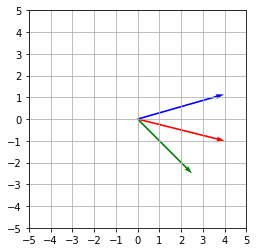

In [25]:
grid_setup()

v = jnp.array([4, -1])
Rv = jnp.matmul(R, v)
Pv = jnp.matmul(P, v)


origin = jnp.array([[0, 0, 0], [0, 0, 0]])

plt.quiver(*origin, [v[0], Rv[0], Pv[0]], [v[1], Rv[1], Pv[1]], 
           color=['r','b','g'], angles='xy', scale_units='xy', scale=1)
plt.show()

#### d. Compute the norm of the original vector, the rotated vector, and the projected vector. How do they compare?

In [26]:
print("The norm of the original vector is ", jnp.linalg.norm(v))
print("The norm of the rotated vector is ", jnp.linalg.norm(Rv))
print("The norm of the projected vector is ", jnp.linalg.norm(Pv))

The norm of the original vector is  4.1231055
The norm of the rotated vector is  4.1231055
The norm of the projected vector is  3.535534


The norms of the original and rotated vectors are equal, but the norm of the projected vector is smaller.

#### e. Plot columns of $R$ and $P$. What properties (or lack thereof) of $R$ and $P$ lead to this?

The columns of $R$ are plotted in red and the columns of $P$ are plotted in green:

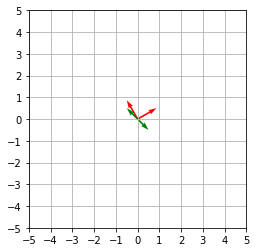

In [27]:
grid_setup()

v = jnp.array([4, -1])
Rv = jnp.matmul(R, v)
Pv = jnp.matmul(P, v)


origin = jnp.array([[0, 0], [0, 0]])

plt.quiver(*origin, [R[0, :], P[0, :]], [R[1, :], P[1, :]], 
           color=['r','r','g','g'], angles='xy', scale_units='xy', scale=1)
plt.show()

As can be observed from the plots, the columns of $R$ are orthonormal, hence $R$ preserves angles and lengths. $P$ lacks this property, so it may or may not preserve the norm of a vector, where in this case, it does not.

### Question 2

#### Create and fix a vector $v = \mathbb{R}^5$ by randomly sampling each entry from the unit Gaussian.


In [28]:
np.random.seed(825277)

v = np.random.normal(0, 1, (5, 1))

#### a. Design a matrix $S$ that sorts $v$ in ascending order, creating the sorted vector $v_{s}$. Print $S$, $v$ and $v_{s}$.

We can design such a matrix, with all zero entries except a single $1$ in each row, as follows:

$$\begin{bmatrix}
0 & 1 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1\\
\end{bmatrix} $$

In [29]:
S = np.array(
[[0, 1, 0, 0, 0],
[0, 0, 1, 0, 0],
[0, 0, 0, 1, 0],
[1, 0, 0, 0, 0],
[0, 0, 0, 0, 1]])

print("S = ", S)
print("v =", v)

vs = np.matmul(S, v)

print("vs = ", vs)

S =  [[0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 0 0 0 1]]
v = [[ 0.03849748]
 [-2.62529078]
 [-1.62003884]
 [-1.17080286]
 [ 0.28103012]]
vs =  [[-2.62529078]
 [-1.62003884]
 [-1.17080286]
 [ 0.03849748]
 [ 0.28103012]]


#### b. Create a matrix $K$ that reverses the order of the sorted vector $v_{s}$, creating a vector called $v_{k}$. Print and $K$ and $v_{k}$.

Similar to the question above, we can design a 'pseudo-identity' matrix with $1$s on the inverse diagonal to reverse a vector.

$$\begin{bmatrix}
0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 0\\
0 & 1 & 0 & 0 & 0\\
1 & 0 & 0 & 0 & 0\\
\end{bmatrix} $$

In [30]:
K = np.array(
[[0, 0, 0, 0, 1],
[0, 0, 0, 1, 0],
[0, 0, 1, 0, 0],
[0, 1, 0, 0, 0],
[1, 0, 0, 0, 0]])

print("K = ", K)

vk = np.matmul(K, vs)

print("vk= ", vk)

K =  [[0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]]
vk=  [[ 0.28103012]
 [ 0.03849748]
 [-1.17080286]
 [-1.62003884]
 [-2.62529078]]


#### c. Using $S$ and $K$, this time first reverse the original vector $v$ and then apply the sorting, creating the new vector $v_{z}$. Are $v_{z}$ and $v_{k}$ the same or are they different?

In [31]:
vi = np.matmul(K, v)
vz = np.matmul(S, vi)

print("vz= ", vz)

vz=  [[-1.17080286]
 [-1.62003884]
 [-2.62529078]
 [ 0.28103012]
 [ 0.03849748]]


It is apparent that $v_{z}$ and $v_{k}$ are different.

#### d. Use $K$ to reverse every column of $S$ to create a new sorting matrix $\hat{S}$. Then sort $v$ using $\hat{S}$ to create $v_{h}$. Are $v_{h}$ and $v_{k}$ the same or are they different?

In [32]:
Shat = np.matmul(K, S)
print("S hat = ", Shat)

vh = np.matmul(Shat, v)
print("vh= ", vh)

S hat =  [[0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]]
vh=  [[ 0.28103012]
 [ 0.03849748]
 [-1.17080286]
 [-1.62003884]
 [-2.62529078]]


Again, it is apparent that $v_{h}$ and $v_{k}$ are different.

#### e. What properties do questions 2c and 2d demonstrate about matrix multiplication?

They demonstrate that matrix multiplication is not necessarily commutative, as evidenced by the fact that

$$ SKv \neq KSv$$

### Question 3
#### Given a vector $v = (1, -4, 3, 7, 0, -3) \in \mathbb{R}^6$,

#### a. Create a matrix $T$ that produces a smoothed vector $\hat{v} = Tv, \hat{v} \in \mathbb{R}^4$ such that $\hat{v}_i = 0.1v_i + 0.3v_{i+1} + 0.6v_{i+2}$ for $i \in {1,2,3,4}$. Print $T$ and $\hat{v}$.

In [33]:
v = [[1],
    [-4],
    [3],
    [7],
    [0],
    [-3]]

T = np.array(
    [[.1, .3, .6, 0, 0, 0],
    [0, .1, .3, .6, 0, 0],
    [0, 0, .1, .3, .6, 0],
    [0, 0, 0, .1, .3, .6]])

print("T = ", T)

vhat = np.matmul(T, v)
print("v hat = ", vhat)

T =  [[0.1 0.3 0.6 0.  0.  0. ]
 [0.  0.1 0.3 0.6 0.  0. ]
 [0.  0.  0.1 0.3 0.6 0. ]
 [0.  0.  0.  0.1 0.3 0.6]]
v hat =  [[ 0.7]
 [ 4.7]
 [ 2.4]
 [-1.1]]


#### b. Does $T$ correspond to a linear function? Demonstrate.

Surely, since every matrix can be associated with a linear function, $T$ corresponds to a linear function. To demonstrate rigorously, we may define $f(x) = Tx$ and see that:

$$\begin{align} f(\alpha x + \beta y) & = T (\alpha x + \beta y) \\
& = A(\alpha x) + A(\beta y) \\
& = \alpha A(x) + \beta A(y) \\
& = \alpha f(x) + \beta f(y)\end{align}$$

that is, $f$ is indeed a linear function, and corresponds to left multiplication with the matrix $T$.

#### c. Imagine $\hat{T}$ such that $\hat{T}\hat{v} = v$. Can such a $\hat{T}$ exist? If yes, please print the matrix. If not, please explain why.

It suffices to note that

$$ Tv = \hat{v} \\ $$

<center>and</center>

$$\hat{T}\hat{v} = v \\ $$

<center>implies</center>

$$\hat{T} = T^{-1}$$

However, $T$ being a $4 \times 6$ matrix, its inverse $T^{-1}$ does not exist. 

#### d. Express the relationship between $\hat{T}$, $\hat{v}$, and $v$ as a system of linear equations (even if a perfect solution is not feasible). Is this an overdetermined or underdetermined system? Why?

The system of linear equations can be expressed as follows: 

$$ v_1 = \hat{T}_{1, 1}\hat{v}_1 + \hat{T}_{1, 2}\hat{v}_2+\hat{T}_{1, 3}\hat{v}_3+\hat{T}_{1, 4}\hat{v}_4 \\
v_2 = \hat{T}_{2, 1}\hat{v}_1 + \hat{T}_{2, 2}\hat{v}_2+\hat{T}_{2, 3}\hat{v}_3+\hat{T}_{2, 4}\hat{v}_4 \\
v_3 = \hat{T}_{3, 1}\hat{v}_1 + \hat{T}_{3, 2}\hat{v}_2+\hat{T}_{3, 3}\hat{v}_3+\hat{T}_{3, 4}\hat{v}_4 \\
v_4 = \hat{T}_{4, 1}\hat{v}_1 + \hat{T}_{4, 2}\hat{v}_2+\hat{T}_{4, 3}\hat{v}_3+\hat{T}_{4, 4}\hat{v}_4 \\ 
v_5 = \hat{T}_{5, 1}\hat{v}_1 + \hat{T}_{5, 2}\hat{v}_2+\hat{T}_{5, 3}\hat{v}_3+\hat{T}_{5, 4}\hat{v}_4 \\
v_6 = \hat{T}_{6, 1}\hat{v}_1 + \hat{T}_{6, 2}\hat{v}_2+\hat{T}_{6, 3}\hat{v}_3+\hat{T}_{6, 4}\hat{v}_4 \\ $$

There are **six** equations involving **four** variables, therefore the system of linear equations is over-determined.

#### e. Apply least-squares method to create a best approximation of $v$ from $\hat{v}$, called $\tilde{v}$. Print $\tilde{v}$.

We are applying the least-squares method to the equation $ Tv = \hat{v}$, therefore the corresponding least squares problem is

$$\text{minimize } (0.1v_1+0.3v_2+0.6v_3-0.7)^2 + (0.1v_2+0.3v_3+0.6v_4-4.7)^2 + (0.1v_3+0.3v_4+0.6v_5-2.4)^2 + (0.1v_4+0.3v_5+0.6v_6+1.1)^2 $$

We can find a solution $\tilde{v}$ to this objective function (which is an approximation to $v$), and also a possible $\hat{T}$ along the way using the following identities:

$$\tilde{v} = \hat{T}\hat{v} \\ 
\text{where }\hat{T} = (T^TT)^{-1}T^T \\ $$

Calculating these quantities:

In [34]:
That = np.matmul(np.linalg.inv(np.matmul(np.transpose(T), T)), np.transpose(T))

vtilde = np.matmul(That, vhat)

print("v tilde = ", vtilde)

v tilde =  [[-47.675 ]
 [216.75  ]
 [-90.125 ]
 [ 22.8   ]
 [  0.45  ]
 [ -6.5875]]


#### f. Is $\hat{T}$ a (pseudo-)inverse of $T$? If yes, which one?

$\hat{T}$ is indeed a pseudo-inverse of $T$, it is called the *Moore-Penrose inverse*. Here is its representation in our example:

In [35]:
print("T hat = ", That)

T hat =  [[-16.        0.      -16.       -1.75   ]
 [ 16.       40.        8.        1.5    ]
 [ -8.      -16.       -4.       -0.25   ]
 [  4.        4.        0.5       0.     ]
 [  0.       -0.75      1.65625   0.     ]
 [ -0.5      -0.5      -0.875     1.625  ]]


### Question 4
#### Combinations of invertible matrices. Suppose the $n \times n$ matrices $A$ and $B$ are both invertible. Determine whether each of the matrices given below is invertible, without any further assumptions about $A$ and $B$.

#### a. $A+B$

Not necessarily invertible. Here is a simple counter example where $n=2$ and both $A$ and $B$ are invertible, but their sum is not:

$$A =\begin{bmatrix}
1 & 0\\
0 & 1
\end{bmatrix}, B =\begin{bmatrix}
-1 & 0\\
0 & -1
\end{bmatrix}  \\ 
A+B =\begin{bmatrix}
0 & 0\\
0 & 0
\end{bmatrix} \\
$$

which is clearly not invertible.

#### b. $\begin{bmatrix} A & 0 \\\\ 0 & B \end{bmatrix}$
*(Taken from F. R. Gantmacher, The Theory of Matrices, Chelsea, New York, 1959)*

Invertible:

$$\begin{bmatrix} A & 0 \\\\ 0 & B \end{bmatrix}^{-1} = \begin{bmatrix} A^{-1} & 0 \\\\ 0 & B^{-1} \end{bmatrix} \\ $$

#### c.  $\begin{bmatrix} A & 0 \\\\ A+B & B \end{bmatrix}$
*(Taken from Tzon-Tzer Lu, Sheng-Hua Shiou, Inverses of 2 × 2 block matrices, Computers & Mathematics with Applications, Volume 43, Issues 1–2, 2002, Pages 119-129)*

Invertible, for a block lower triangular matrix, we have:

$$\begin{bmatrix} A & 0 \\\\ C & D \end{bmatrix}^{-1} = \begin{bmatrix} A^{-1} & 0 \\\\ -D^{-1}CA^{-1} & D^{-1} \end{bmatrix} \\ $$

where $A$ and $D$ are invertible. Applying the formula, we have

$$\begin{bmatrix} A & 0 \\\\ A+B & B \end{bmatrix}^{-1} = \begin{bmatrix} A^{-1} & 0 \\\\ B^{-1}+A^{-1} & B^{-1} \end{bmatrix} \\  $$

#### d. $ABA$

Invertible:

$$(ABA)^{-1} = A^{-1}B^{-1}A^{-1}$$


### Question 5
#### Implement the following steps:

#### a. Generate 20 equispaced points in the interval $[-1, 1]$ i.e. with equal intervals among them.

In [36]:
x = np.linspace(-1, 1, 20)

#### b. For all 20 points compute $y = \sin(2\pi x/ T) + \epsilon$, where $\epsilon \sim \mathcal{N}(0,\sigma^2I)$ with $\sigma=0.1$ Create a scatter plot of $x$ vs $y$ for the 20 points you generated for period parameter $T=1.5$.

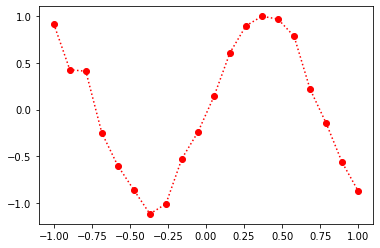

In [37]:
T = 1.5
y = np.sin(2*np.pi*x/T) + 0.1*np.random.randn(20)

plt.plot(x, y, 'r:o')
plt.show()

#### c. For approximating $y$ with a polynomial of degree at most 10, construct the Vandermonde matrix $V$ based on $x$, where $V$ has the form $V_{ij}=x^j_i$.

In [38]:
V = np.transpose(np.c_[[x**i for i in range(10)]])

#### d. Compute the $QR$ decomposition of $V$. Let $q_0, \dots, q_{10}$ be the columns of $Q$. Plot each of the first 5 individual columns of the matrix $Q$ against as $x$ a scatter plot.

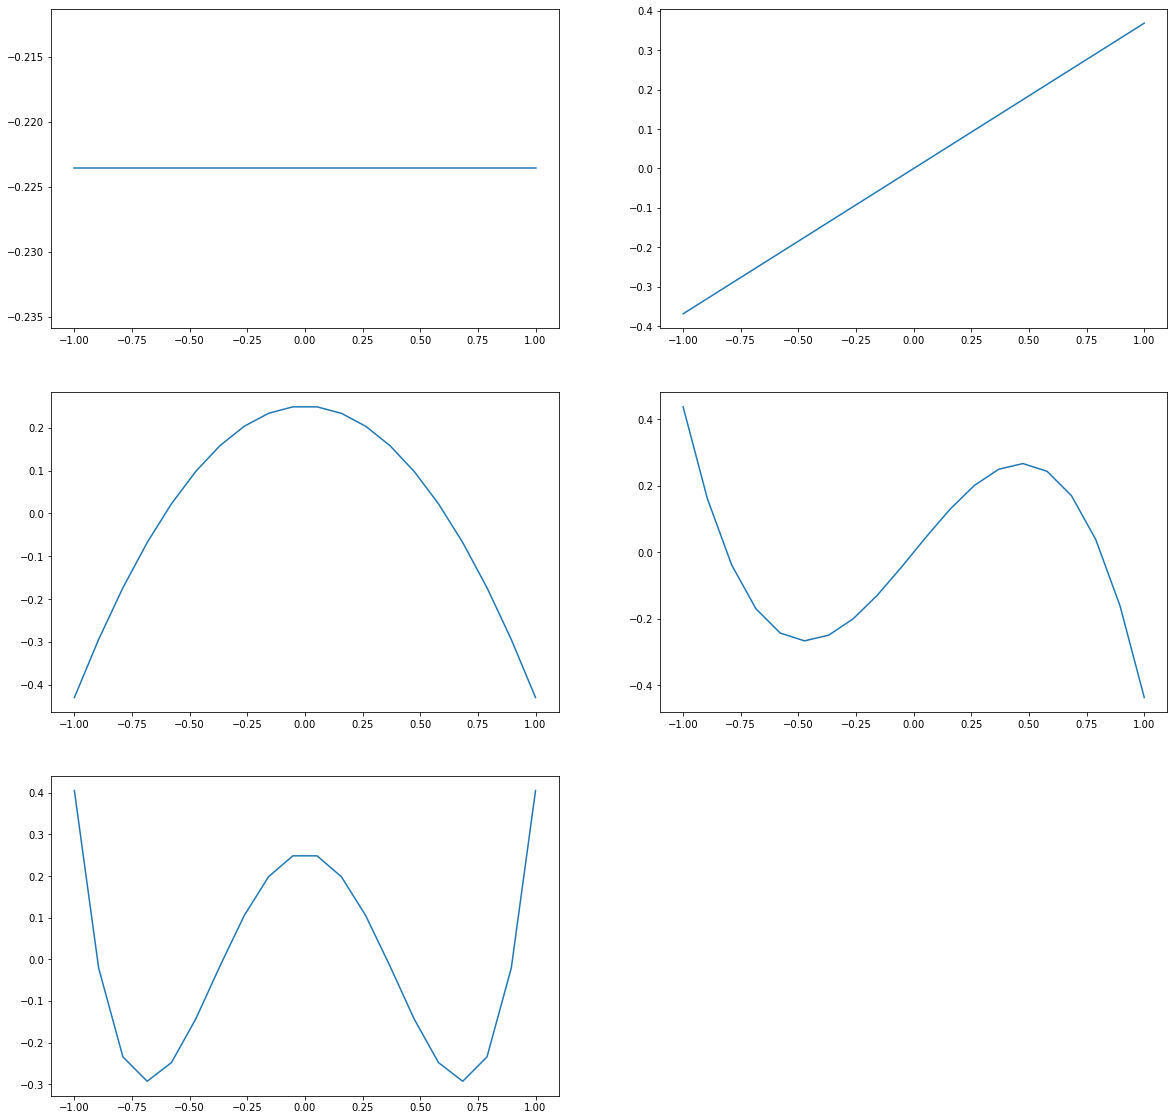

In [39]:
Q, R = np.linalg.qr(V)

plt.figure(figsize=(20, 20))

for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.plot(x, Q[:, i])
plt.show()

#### e. We wish to compute a series of successive approximations to $y$, by computing $Qc^{(j)}$ where $j \in {0, \dots, 10}$. Here, $c^{(j)}$ corresponds to the vector $[c_0, c_1, \dots, c_j, 0, 0, …, 0]^T$. How can we find the best $c^{(j)}$ that minimizes the $\|y - Qc^{(j)}\|$ for each $j$? Plot $x$ vs $y$ as well as the approximations for $j = 0, 5$, and (which we can name $y^{(0)}, y^{(5)}, y^{(10)}$) in a scatter plot, comparing the original relationship to the three approximations.

We can find the best approximations using polynomial regression as follows:

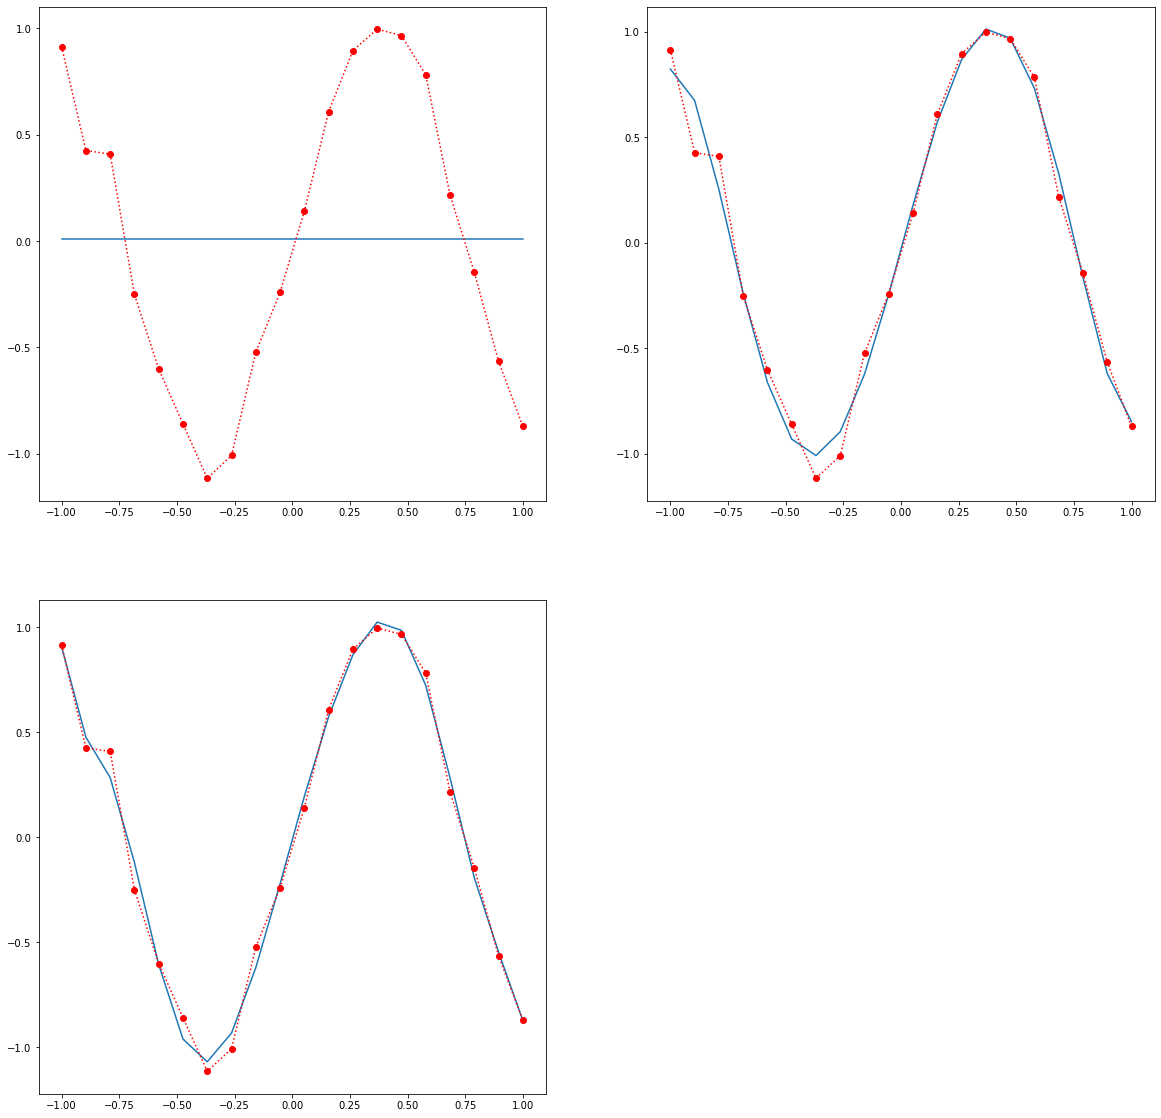

In [40]:
plt.figure(figsize=(20, 20))

for i in range(3):
    j = i*5
    c = np.matmul(np.transpose(Q[:, 0:j+1]), y)
    plt.subplot(2, 2, i+1)
    
    plt.plot(x, np.matmul(Q[:, 0:j+1], c))
    plt.plot(x, y, 'o:r')

plt.show()

#### f. Repeat the previous approximation experiment with $y = Vc^{(j)}$, again compute the approximations and plot $x$ vs $y$ as well as $y^{(0)}, y^{(5)}, y^{(10)}$. Compare these approximations with those in question 5e. Which approximation worked better? Why do you think this is the case? Do the matrices $V$ and $Q$ span different subspaces?

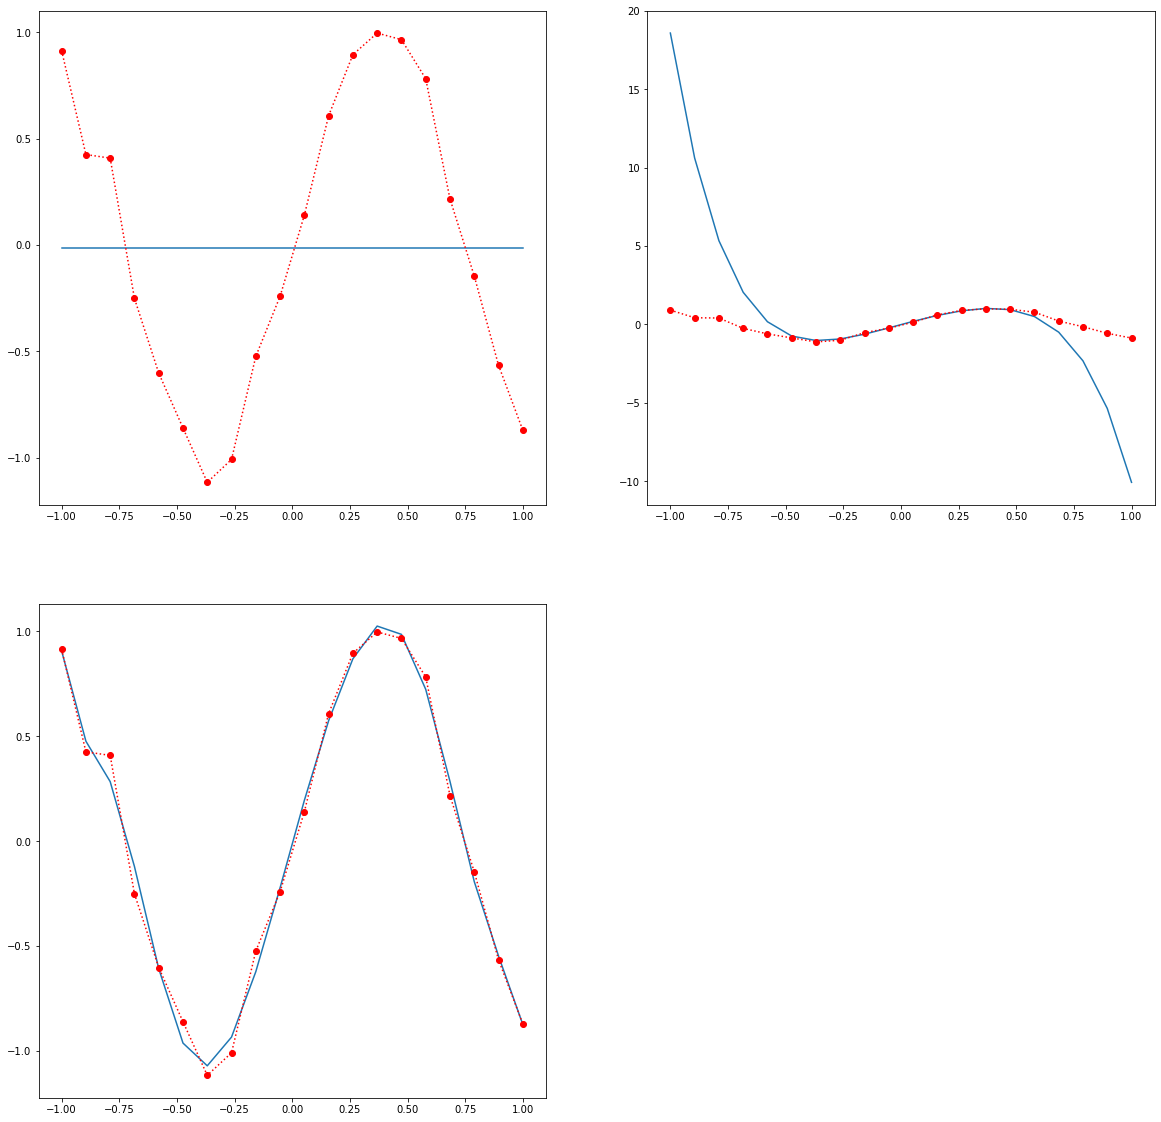

In [41]:
plt.figure(figsize=(20, 20))

c = np.matmul(np.linalg.inv(R), np.matmul(np.transpose(Q), y))

for i in range(3):
    j = i*5
    plt.subplot(2, 2, i+1)
        
    plt.plot(x, np.matmul(V[:, 0:j+1], c[0:j+1]))
    plt.plot(x, y, 'o:r')

plt.show()

We can visually infer that the first approximations worked much better than these ones. The columns of $V$ and $Q$ actually span the exact same subspace, the polynomial subspace. The only difference is that the columns of $Q$ are **orthogonal**.